In [5]:
#Import packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
import nltk
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(5,5))
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings

In [6]:
#Read data using pandas data frame
chan = pd.read_csv('chan.csv')
reddit = pd.read_csv('Reddit.csv')
twitter = pd.read_csv('twitter.csv')

In [7]:

#chan=chan.drop(columns=["_id"], axis = 1)
chan.head()

,_id,text,now,fname
0,6364c6be8a1c9aa4ec81f334,"<a href=""#p124928094"" class=""quotelink"">&gt;&g...",11/04/22(Fri)03:58:40,NaN
1,6364c6be8a1c9aa4ec81f335,"<a href=""#p124928125"" class=""quotelink"">&gt;&g...",11/04/22(Fri)03:59:19,NaN
2,6364c6be8a1c9aa4ec81f336,"<a href=""#p124928094"" class=""quotelink"">&gt;&g...",11/04/22(Fri)04:00:04,NaN
3,6364c6be8a1c9aa4ec81f337,"<a href=""#p124928139"" class=""quotelink"">&gt;&g...",11/04/22(Fri)04:00:34,1637647300922
4,6364c6be8a1c9aa4ec81f338,"<a href=""#p124920194"" class=""quotelink"">&gt;&g...",11/04/22(Fri)04:00:42,nashjfif


In [8]:
#show reddit data
reddit.head()

,_id,index,subreddit,title,selftext,ups,downs,score,created_utc,id,kind
0,6364b7fb739352de1da70309,0,Coronavirus,COVID-19 and systemic lupus erythematosus gene...,NaN,3,0,3,2022-11-04T04:41:55Z,ylp188,t3
1,6364b7fb739352de1da7030a,1,Coronavirus,A multinational Delphi consensus to end the CO...,NaN,3,0,3,2022-11-04T04:04:23Z,ylobtb,t3
2,6364b7fb739352de1da7030b,2,Coronavirus,How to stock up on free rapid COVID-19 tests a...,NaN,15,0,15,2022-11-04T03:21:35Z,ylnhdr,t3
3,6364b7fb739352de1da7030c,3,Coronavirus,U.S. faces pandemic crossroads with Covid deat...,NaN,1965,0,1965,2022-11-03T21:32:24Z,ylfqdq,t3
4,6364b7fb739352de1da7030d,4,Coronavirus,Are the unvaccinated still a danger to the res...,NaN,140,0,140,2022-11-03T20:55:15Z,ylen9a,t3


In [9]:
#show twitter data
twitter.head()

,_id,data.edit_history_tweet_ids.0,data.id,data.text,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag
0,6364a29922b5a16ff9d34114,1588402340574695425,1588402340574695425,yoooo wtf is this covid headache i feel like m...,1587279547170447364,NaN,NaN,NaN,NaN,NaN
1,6364a29a22b5a16ff9d34116,1588402345695932416,1588402345695932416,@afshineemrani https://t.co/f6SlQgptvA,1587279547170447364,NaN,1.587280e+18,NaN,NaN,NaN
2,6364a29b22b5a16ff9d34118,1588402347990188039,1588402347990188039,@PedroRonchi2 Genial!,1588402342839328769,NaN,NaN,NaN,NaN,NaN
3,6364a29c22b5a16ff9d3411a,1588402352666529792,1588402352666529792,"@Tiziana_DR Il magari, ottimo referto della sc...",1588402342839328769,NaN,NaN,NaN,NaN,NaN
4,6364a29c22b5a16ff9d3411c,1588402350133506048,1588402350133506048,@PierrePoilievre Singh now supports the Tories!,1588402342839328769,NaN,NaN,NaN,NaN,NaN


In [10]:
#Rename the column names of reddit, 4chan and twitter
chan.rename(columns={'text':'post'}, inplace=True)
reddit.rename(columns={'title':'post'}, inplace=True)
twitter.rename(columns={'data.text':'post'}, inplace=True)


In [11]:
#convert post type to string
chan['post'] = chan['post'].apply(str)
chan.head()

,_id,post,now,fname
0,6364c6be8a1c9aa4ec81f334,"<a href=""#p124928094"" class=""quotelink"">&gt;&g...",11/04/22(Fri)03:58:40,NaN
1,6364c6be8a1c9aa4ec81f335,"<a href=""#p124928125"" class=""quotelink"">&gt;&g...",11/04/22(Fri)03:59:19,NaN
2,6364c6be8a1c9aa4ec81f336,"<a href=""#p124928094"" class=""quotelink"">&gt;&g...",11/04/22(Fri)04:00:04,NaN
3,6364c6be8a1c9aa4ec81f337,"<a href=""#p124928139"" class=""quotelink"">&gt;&g...",11/04/22(Fri)04:00:34,1637647300922
4,6364c6be8a1c9aa4ec81f338,"<a href=""#p124920194"" class=""quotelink"">&gt;&g...",11/04/22(Fri)04:00:42,nashjfif


In [12]:
#Remove https links
twitter['post'] = twitter['post'].apply(lambda x:re.sub(r"http\S+", "", x))
chan['post'] = chan['post'].apply(lambda x:re.sub(r"http\S+", "", x))
reddit['post'] = reddit['post'].apply(lambda x:re.sub(r"http\S+", "", x))

In [13]:
#Remove html tags
CLEANR = re.compile('<.*?>') 

twitter['post'] = twitter['post'].apply(lambda x:re.sub(CLEANR, "", x))
chan['post'] = chan['post'].apply(lambda x:re.sub(CLEANR, "", x))
reddit['post'] = reddit['post'].apply(lambda x:re.sub(CLEANR, "", x))

In [14]:
#Remove single digit numbers
order = r'[0-9]'
twitter['post'] = twitter['post'].apply(lambda x:re.sub(order, "", x))
chan['post'] = chan['post'].apply(lambda x:re.sub(order, "", x))
reddit['post'] = reddit['post'].apply(lambda x:re.sub(order, "", x))


In [15]:
#Remove Punctuations
pattern = r'[' + string.punctuation + ']'
twitter['post'] = twitter['post'].apply(lambda x:re.sub(pattern, "", x))
chan['post'] = chan['post'].apply(lambda x:re.sub(pattern, "", x))
reddit['post'] = reddit['post'].apply(lambda x:re.sub(pattern, "", x))


In [16]:
#Remove special characters
def Removespc(string):
    specialchar = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in specialchar:
        post = string.replace(i, '')
        
    return post

In [17]:
chan.post = chan.post.apply(Removespc)
reddit.post = reddit.post.apply(Removespc)
twitter.post = twitter.post.apply(Removespc)

In [18]:
# Concat reddit, 4chan and twiter data to show the whole dataset available
Total = pd.concat([chan, reddit, twitter], ignore_index=True)
chan.drop_duplicates(keep=False, inplace=True)
twitter.drop_duplicates(subset='post', keep=False, inplace=True)

In [19]:
counts = [len(chan)+100000, len(reddit), len(twitter), len(Total)]
labels = ['chan','Reddit', 'Twitter', 'Total']
colors = ['#B22222', '#F0F8FF', '#50C878', '#FF7F50']

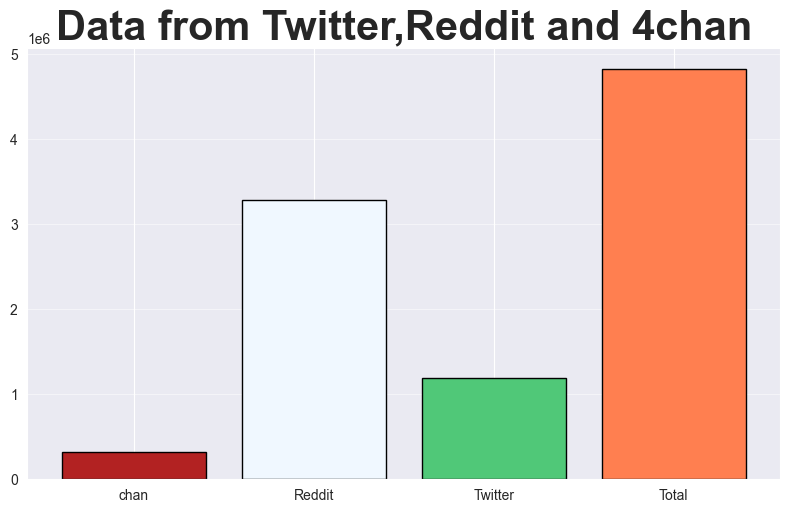

In [90]:
#Plot of total reddit,twitter and dataset available
plt.figure(figsize=(8,5))
plt.bar(labels, counts, color=colors, edgecolor='black')

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.title('Data from Twitter,Reddit and 4chan',fontsize = 30,fontweight = 'bold')
plt.savefig('one.png')

In [21]:
#Summary of twitter dataset
twitter.describe()

,data.edit_history_tweet_ids.0,data.id,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag
count,1.192361e+06,1.192361e+06,1.192361e+06,0.0,2.144320e+05,0.0,2.662100e+04,0.0
mean,1.590755e+18,1.590755e+18,1.590746e+18,NaN,1.590725e+18,NaN,1.590655e+18,NaN
std,7.299551e+14,7.299551e+14,7.339073e+14,NaN,7.384901e+14,NaN,7.567026e+14,NaN
min,1.588402e+18,1.588402e+18,1.587280e+18,NaN,1.588402e+18,NaN,1.588402e+18,NaN
25%,1.590528e+18,1.590528e+18,1.590527e+18,NaN,1.590478e+18,NaN,1.590202e+18,NaN
50%,1.590905e+18,1.590905e+18,1.590902e+18,NaN,1.590872e+18,NaN,1.590812e+18,NaN
75%,1.591254e+18,1.591254e+18,1.591249e+18,NaN,1.591219e+18,NaN,1.591189e+18,NaN
max,1.591642e+18,1.591642e+18,1.591642e+18,NaN,1.591642e+18,NaN,1.591642e+18,NaN


In [22]:
#Summary of Reddit dataset
reddit.describe()

,index,ups,downs,score
count,3.283803e+06,3.283803e+06,3283803.0,3.283803e+06
mean,4.939206e+01,4.529859e+02,0.0,4.529859e+02
std,2.887336e+01,3.776356e+03,0.0,3.776356e+03
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,2.400000e+01,5.000000e+00,0.0,5.000000e+00
50%,4.900000e+01,1.600000e+01,0.0,1.600000e+01
75%,7.400000e+01,6.800000e+01,0.0,6.800000e+01
max,9.900000e+01,1.124700e+05,0.0,1.124700e+05


In [23]:
#Summary of 4chan dataset
chan.describe()

,_id,post,now,fname
count,224838,224838,224838,39762
unique,224838,80928,84266,14969
top,6364c6be8a1c9aa4ec81f334,gtgt,11/08/22(Tue)17:53:22,file
freq,1,4734,37,526


In [24]:
#Shape the dataset
twitter.shape

(1192361, 10)

In [25]:
reddit.shape

(3283803, 11)

In [26]:
chan.shape

(224838, 4)

In [27]:
#Find the data type
twitter.dtypes

_id                               object
data.edit_history_tweet_ids.0      int64
data.id                            int64
post                              object
matching_rules.0.id                int64
matching_rules.0.tag             float64
matching_rules.1.id              float64
matching_rules.1.tag             float64
matching_rules.2.id              float64
matching_rules.2.tag             float64
dtype: object

In [28]:
reddit.dtypes

_id            object
index           int64
subreddit      object
post           object
selftext       object
ups             int64
downs           int64
score           int64
created_utc    object
id             object
kind           object
dtype: object

In [29]:
chan.dtypes

_id      object
post     object
now      object
fname    object
dtype: object

In [30]:
#show null counts
twitter.isnull().sum()

_id                                    0
data.edit_history_tweet_ids.0          0
data.id                                0
post                                   0
matching_rules.0.id                    0
matching_rules.0.tag             1192361
matching_rules.1.id               977929
matching_rules.1.tag             1192361
matching_rules.2.id              1165740
matching_rules.2.tag             1192361
dtype: int64

In [31]:
#show null counts
reddit.isnull().sum()

_id                  0
index                0
subreddit            0
post                 0
selftext       2220245
ups                  0
downs                0
score                0
created_utc          0
id                   0
kind                 0
dtype: int64

In [32]:
chan.isnull().sum()

_id           0
post          0
now           0
fname    185076
dtype: int64

In [33]:
#fill null data with string
chan["post"].fillna("No Text", inplace = True)

In [34]:
# Conver to Lowercase
chan['post'] = chan['post'].str.lower()
twitter['post'] = twitter['post'].str.lower()
reddit['post'] = reddit['post'].str.lower()
twitter.head()

,_id,data.edit_history_tweet_ids.0,data.id,post,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag
0,6364a29922b5a16ff9d34114,1588402340574695425,1588402340574695425,yoooo wtf is this covid headache i feel like m...,1587279547170447364,NaN,NaN,NaN,NaN,NaN
2,6364a29b22b5a16ff9d34118,1588402347990188039,1588402347990188039,pedroronchi genial,1588402342839328769,NaN,NaN,NaN,NaN,NaN
3,6364a29c22b5a16ff9d3411a,1588402352666529792,1588402352666529792,tizianadr il magari ottimo referto della scienza,1588402342839328769,NaN,NaN,NaN,NaN,NaN
4,6364a29c22b5a16ff9d3411c,1588402350133506048,1588402350133506048,pierrepoilievre singh now supports the tories,1588402342839328769,NaN,NaN,NaN,NaN,NaN
5,6364a29c22b5a16ff9d3411e,1588402352201289731,1588402352201289731,sipslow dailyloud some people just enjoy being...,1588402342839328770,NaN,NaN,NaN,NaN,NaN


In [35]:
#Remove Single character and double space 
chan["post"] = chan["post"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
chan["post"] = chan["post"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
chan.head()

,_id,post,now,fname
0,6364c6be8a1c9aa4ec81f334,gtgtkek,11/04/22(Fri)03:58:40,NaN
1,6364c6be8a1c9aa4ec81f335,gtgtalright,11/04/22(Fri)03:59:19,NaN
2,6364c6be8a1c9aa4ec81f336,gtgtlel,11/04/22(Fri)04:00:04,NaN
3,6364c6be8a1c9aa4ec81f337,gtgt,11/04/22(Fri)04:00:34,1637647300922
4,6364c6be8a1c9aa4ec81f338,gtgtgtlakers th seed gtwarriors th seed gtclip...,11/04/22(Fri)04:00:42,nashjfif


In [36]:

twitter["post"] = twitter["post"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
twitter["post"] = twitter["post"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
twitter.head()

,_id,data.edit_history_tweet_ids.0,data.id,post,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag
0,6364a29922b5a16ff9d34114,1588402340574695425,1588402340574695425,yoooo wtf is this covid headachefeel like my b...,1587279547170447364,NaN,NaN,NaN,NaN,NaN
2,6364a29b22b5a16ff9d34118,1588402347990188039,1588402347990188039,pedroronchi genial,1588402342839328769,NaN,NaN,NaN,NaN,NaN
3,6364a29c22b5a16ff9d3411a,1588402352666529792,1588402352666529792,tizianadr il magari ottimo referto della scienza,1588402342839328769,NaN,NaN,NaN,NaN,NaN
4,6364a29c22b5a16ff9d3411c,1588402350133506048,1588402350133506048,pierrepoilievre singh now supports the tories,1588402342839328769,NaN,NaN,NaN,NaN,NaN
5,6364a29c22b5a16ff9d3411e,1588402352201289731,1588402352201289731,sipslow dailyloud some people just enjoy being...,1588402342839328770,NaN,NaN,NaN,NaN,NaN


In [37]:
reddit["post"] = reddit["post"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
reddit["post"] = reddit["post"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
reddit.head()


,_id,index,subreddit,post,selftext,ups,downs,score,created_utc,id,kind
0,6364b7fb739352de1da70309,0,Coronavirus,covid and systemic lupus erythematosus genetic...,NaN,3,0,3,2022-11-04T04:41:55Z,ylp188,t3
1,6364b7fb739352de1da7030a,1,Coronavirus,a multinational delphi consensus to end the co...,NaN,3,0,3,2022-11-04T04:04:23Z,ylobtb,t3
2,6364b7fb739352de1da7030b,2,Coronavirus,how to stock up on free rapid covid tests ahea...,NaN,15,0,15,2022-11-04T03:21:35Z,ylnhdr,t3
3,6364b7fb739352de1da7030c,3,Coronavirus,us faces pandemic crossroads with covid deaths...,NaN,1965,0,1965,2022-11-03T21:32:24Z,ylfqdq,t3
4,6364b7fb739352de1da7030d,4,Coronavirus,are the unvaccinated stilldanger to the rest o...,NaN,140,0,140,2022-11-03T20:55:15Z,ylen9a,t3


In [38]:
from nltk.tokenize import word_tokenize

'''stop = set(stopwords.words("english"))
def stopwords(text):    
    filtered_words = " ".join([word.lower() for word in text.split() if word.lower() not in stop])
    return filtered_words'''

STOPWORDS = {'his', 'of', 'ours', 'o', "it's", 'having', "hasn't", 'all', "aren't", 'they', 'a', 'shan', "wouldn't", 'your', 'until', "shan't", "weren't", 'our', 'shouldn', 'from', 'my', 'off', "she's", 'is', 'into', 'me', 'wasn', 'why', 'after', 'with', 'between', 'myself', 'has', 'not', 'you', "hadn't", 'both', 'itself', 'above', 'on', 'as', 'but', 'their', 'then', 'few', 'because', 'am', 'wouldn', 'yourself', 'there', 'couldn', 'before', 'when', 'while', 'that', 'to', 'll', 'who', 'nor', 'by', 'during', 'i', 'ma', 'such', 'him', 'out', 'yours', "isn't", 'them', 'same', 'can', 'again', 'it', 'aren', 'how', 'mustn', 'been', "don't", "shouldn't", 'haven', 'ourselves', 'hasn', 'over', 'these', 'won', 'about', 'here', 'so', 'does', 'own', 'or', 're', "you've", 'needn', 's', 'against', "you're", 'through', 'and', 'did', "couldn't", 'don', 'should', 'very', 'he', 'will', 'mightn', 'its', 'some', 'only', 'd', 'where', 'themselves', 'didn', 'too', 'in', "won't", 'are', 'what', 'below', 'herself', 'now', "you'll", 'at', 'which', 'further', 'theirs', 'weren', 'doing', 'y', "that'll", 'was', 'isn', 'once', 'for', "haven't", 'her', 'she', 'we', 'this', 'hadn', "should've", 'himself', "wasn't", "mustn't", 'than', 'those', 'just', 'no', 'whom', 'other', 'under', "didn't", 'doesn', 'up', 'being', 't', 'each', 'an', 'ain', 'yourselves', 'do', 'have', 'down', 'more', "mightn't", 'most', 'if', 'any', "doesn't", "needn't", 'had', 'the', 'were', "you'd", 'be', 'hers', 've', 'm'}
STOPWORDS.update(['de','know','should','would','still','le','time','que','la','get','like','amp','in','new','en','one','se','el','us'])
def stopword(text):
    return " ".join([word.lower() for word in str(text).split() if word not in STOPWORDS])

twitter["post"] = twitter["post"].apply(lambda text: stopword(text))
twitter.head()

,_id,data.edit_history_tweet_ids.0,data.id,post,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag
0,6364a29922b5a16ff9d34114,1588402340574695425,1588402340574695425,yoooo wtf covid headachefeel brain tryna escap...,1587279547170447364,NaN,NaN,NaN,NaN,NaN
2,6364a29b22b5a16ff9d34118,1588402347990188039,1588402347990188039,pedroronchi genial,1588402342839328769,NaN,NaN,NaN,NaN,NaN
3,6364a29c22b5a16ff9d3411a,1588402352666529792,1588402352666529792,tizianadr il magari ottimo referto della scienza,1588402342839328769,NaN,NaN,NaN,NaN,NaN
4,6364a29c22b5a16ff9d3411c,1588402350133506048,1588402350133506048,pierrepoilievre singh supports tories,1588402342839328769,NaN,NaN,NaN,NaN,NaN
5,6364a29c22b5a16ff9d3411e,1588402352201289731,1588402352201289731,sipslow dailyloud people enjoy pieces crap pan...,1588402342839328770,NaN,NaN,NaN,NaN,NaN


In [39]:
#Remove stopwords
reddit["post"] = reddit["post"].apply(lambda text: stopword(text))
chan["post"] = chan["post"].apply(str)
chan["post"] = chan["post"].apply(lambda text: stopword(text))
reddit.head()

,_id,index,subreddit,post,selftext,ups,downs,score,created_utc,id,kind
0,6364b7fb739352de1da70309,0,Coronavirus,covid systemic lupus erythematosus geneticsbal...,NaN,3,0,3,2022-11-04T04:41:55Z,ylp188,t3
1,6364b7fb739352de1da7030a,1,Coronavirus,multinational delphi consensus end covid publi...,NaN,3,0,3,2022-11-04T04:04:23Z,ylobtb,t3
2,6364b7fb739352de1da7030b,2,Coronavirus,stock free rapid covid tests ahead ofpossible ...,NaN,15,0,15,2022-11-04T03:21:35Z,ylnhdr,t3
3,6364b7fb739352de1da7030c,3,Coronavirus,faces pandemic crossroads covid deaths high om...,NaN,1965,0,1965,2022-11-03T21:32:24Z,ylfqdq,t3
4,6364b7fb739352de1da7030d,4,Coronavirus,unvaccinated stilldanger rest,NaN,140,0,140,2022-11-03T20:55:15Z,ylen9a,t3


In [40]:
# Removal Emoji
emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    
twitter["post"] = twitter["post"].apply(str)
twitter["post"] = twitter["post"].apply(lambda x:emoji_pattern.sub(r'', x))


In [41]:

reddit["post"] = reddit["post"].apply(str)
reddit["post"] = reddit["post"].apply(lambda x:emoji_pattern.sub(r'', x))


In [42]:
chan["post"] = chan["post"].apply(str)
chan["post"] = chan["post"].apply(lambda x:emoji_pattern.sub(r'', x))
chan.head()

,_id,post,now,fname
0,6364c6be8a1c9aa4ec81f334,gtgtkek,11/04/22(Fri)03:58:40,NaN
1,6364c6be8a1c9aa4ec81f335,gtgtalright,11/04/22(Fri)03:59:19,NaN
2,6364c6be8a1c9aa4ec81f336,gtgtlel,11/04/22(Fri)04:00:04,NaN
3,6364c6be8a1c9aa4ec81f337,gtgt,11/04/22(Fri)04:00:34,1637647300922
4,6364c6be8a1c9aa4ec81f338,gtgtgtlakers th seed gtwarriors th seed gtclip...,11/04/22(Fri)04:00:42,nashjfif


In [43]:
#common words
#taking top common words from reddit and extracting their occurce from twitter and 4 chan and comparing them
from collections import Counter
cnt = Counter()
for text in reddit["post"].values:
    for word in text.split():
        cnt[word] += 1
lis = []
for i in range(0,10):
    ch = cnt.most_common()[i][0]
    lis.append(ch)
    #lis = lis.append(ch)
print(lis)

df = pd.DataFrame (cnt.most_common(10), columns = ['common_name', 'Reddit_count'])
df.head()

cnt.most_common(10)

['covid', 'vaccine', 'cases', 'omicron', 'pandemic', 'booster', 'health', 'sarscov', 'deaths', 'vaccination']


[('covid', 1202464),
 ('vaccine', 293416),
 ('cases', 188729),
 ('omicron', 147621),
 ('pandemic', 123777),
 ('booster', 119716),
 ('health', 119188),
 ('sarscov', 106573),
 ('deaths', 104600),
 ('vaccination', 100795)]

In [44]:
# common words
from collections import Counter
cnt = Counter()
for text in twitter["post"].values:
    for word in text.split():
        cnt[word] += 1
lis = []
lis.append(cnt['covid'])
lis.append(cnt['vaccine'])
lis.append(cnt['cases'])
lis.append(cnt['omicron'])
lis.append(cnt['pandemic'])
lis.append(cnt['booster'])
lis.append(cnt['health'])
lis.append(cnt['sarscov'])
lis.append(cnt['deaths'])
lis.append(cnt['vaccination'])
    
print(lis)
df['twitter_count'] = lis
df.head()


[408277, 31289, 9633, 2377, 61387, 6666, 20918, 2162, 16423, 5983]


,common_name,Reddit_count,twitter_count
0,covid,1202464,408277
1,vaccine,293416,31289
2,cases,188729,9633
3,omicron,147621,2377
4,pandemic,123777,61387


In [45]:
#common words
from collections import Counter
cnt = Counter()
for text in chan["post"].values:
    for word in text.split():
        cnt[word] += 1
lis = []
lis.append(cnt['covid'])
lis.append(cnt['vaccine'])
lis.append(cnt['cases'])
lis.append(cnt['omicron'])
lis.append(cnt['pandemic'])
lis.append(cnt['booster'])
lis.append(cnt['health'])
lis.append(cnt['sarscov'])
lis.append(cnt['deaths'])
lis.append(cnt['vaccination'])
    
print(lis)
df['chan_count'] = lis
df.head()

[167, 34, 195, 0, 23, 28, 81, 0, 53, 0]


,common_name,Reddit_count,twitter_count,chan_count
0,covid,1202464,408277,167
1,vaccine,293416,31289,34
2,cases,188729,9633,195
3,omicron,147621,2377,0
4,pandemic,123777,61387,23


In [46]:
#Calculate common_words percentage in all datasets
df['%_Reddit'] = df["Reddit_count"].apply(lambda x:x/(len(reddit)) * 100)
df['%_Twitter'] = df["twitter_count"].apply(lambda x:x/(len(twitter)) * 100)
df['%_4chan'] = df["chan_count"].apply(lambda x:x/(len(chan)/100) * 100)
df.head()

,common_name,Reddit_count,twitter_count,chan_count,%_Reddit,%_Twitter,%_4chan
0,covid,1202464,408277,167,36.618031,34.241056,7.427570
1,vaccine,293416,31289,34,8.935250,2.624121,1.512200
2,cases,188729,9633,195,5.747269,0.807893,8.672911
3,omicron,147621,2377,0,4.495428,0.199352,0.000000
4,pandemic,123777,61387,23,3.769319,5.148357,1.022959


In [47]:
#show percentage of common_words from all data sets
Table = df[["common_name","%_Reddit", "%_Twitter", "%_4chan"]]
Table.head(10)

,common_name,%_Reddit,%_Twitter,%_4chan
0,covid,36.618031,34.241056,7.427570
1,vaccine,8.935250,2.624121,1.512200
2,cases,5.747269,0.807893,8.672911
3,omicron,4.495428,0.199352,0.000000
4,pandemic,3.769319,5.148357,1.022959
5,booster,3.645651,0.559059,1.245341
6,health,3.629572,1.754334,3.602594
7,sarscov,3.245414,0.181321,0.000000
8,deaths,3.185331,1.377351,2.357253
9,vaccination,3.069459,0.501778,0.000000


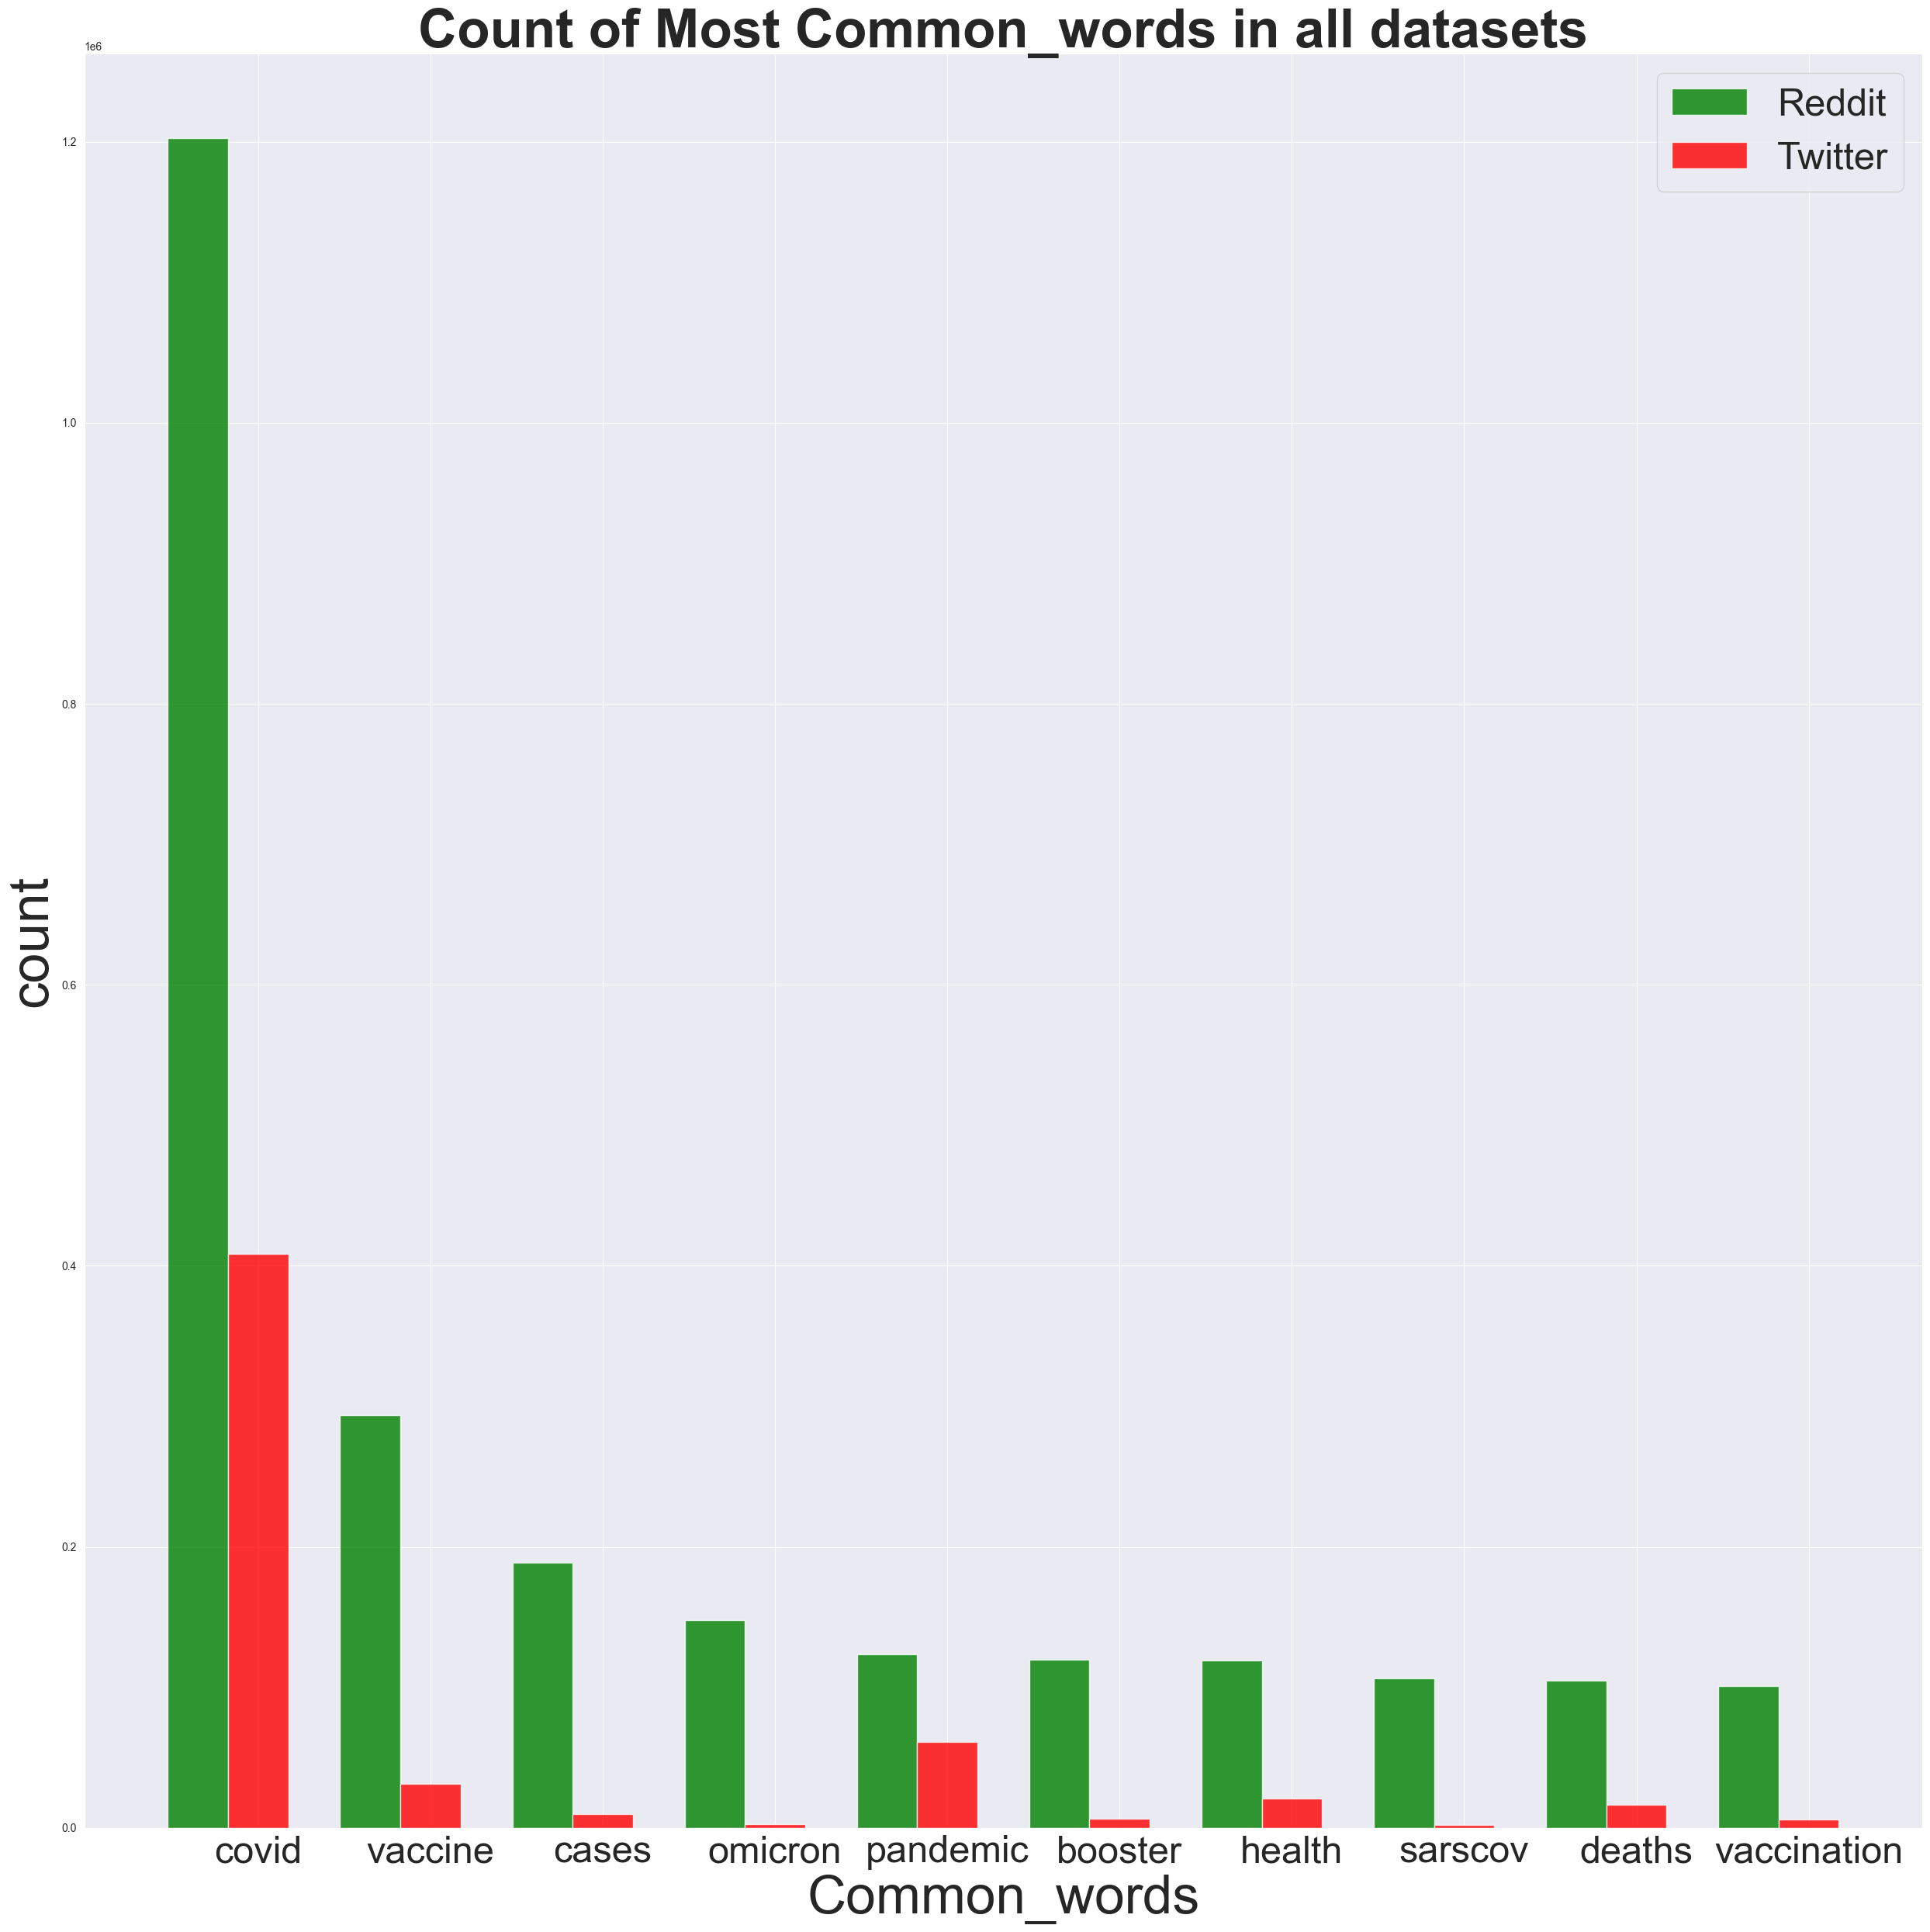

In [49]:
#compare common words between Reddit and Twitter using bar plot
fig, ax = plt.subplots()
plt.rc('figure',figsize=(25,25))
index = np.arange(10)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df['Reddit_count'], bar_width,
alpha=opacity,
color='g',
label='Reddit')

rects2 = plt.bar(index + bar_width, df['twitter_count'], bar_width,
alpha=opacity,
color='r',
label='Twitter')


plt.xlabel('Common_words',fontsize = 50)
plt.ylabel('count', fontsize = 50)
plt.title('Count of Most Common_words in all datasets',fontsize = 50,fontweight = 'bold')
plt.xticks(index + bar_width, df['common_name'],fontsize = 35)
plt.legend(prop={'size': 35})

plt.tight_layout()
plt.savefig('two.png')
plt.show()

In [51]:
# Sentiment analysis of Twitter tweets
nltk.download('vader_lexicon')
sid = SIA()
twitter['sentiments'] = twitter["post"].apply(lambda x: sid.polarity_scores(x))
twitter['Positive'] = twitter['sentiments'].apply(lambda x: x['pos']) 
twitter['Neutral'] = twitter['sentiments'].apply(lambda x: x['neu'])
twitter['Negative'] = twitter['sentiments'].apply(lambda x: x['neg'])
twitter.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harsha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,_id,data.edit_history_tweet_ids.0,data.id,post,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag,sentiments,Positive,Neutral,Negative
0,6364a29922b5a16ff9d34114,1588402340574695425,1588402340574695425,yoooo wtf covid headachefeel brain tryna escap...,1587279547170447364,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.33, 'neu': 0.522, 'pos': 0.148, 'com...",0.148,0.522,0.330
2,6364a29b22b5a16ff9d34118,1588402347990188039,1588402347990188039,pedroronchi genial,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.737,0.263,0.000
3,6364a29c22b5a16ff9d3411a,1588402352666529792,1588402352666529792,tizianadr il magari ottimo referto della scienza,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000
4,6364a29c22b5a16ff9d3411c,1588402350133506048,1588402350133506048,pierrepoilievre singh supports tories,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.455,0.545,0.000
5,6364a29c22b5a16ff9d3411e,1588402352201289731,1588402352201289731,sipslow dailyloud people enjoy pieces crap pan...,1588402342839328770,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.101, 'neu': 0.546, 'pos': 0.353, 'co...",0.353,0.546,0.101


In [52]:
#getting Sentiment type from sentiment score as postive(1), negative(-1) and neutral as 0
def great(x):
    if (x['pos'] >= x['neu']) and (x['pos'] >= x['neg']):
       largest = 1
    elif (x['neu'] >= x['pos']) and (x['neu'] >= x['neg']):
       largest = 0
    else:
       largest = -1
    return largest        

twitter['AVG_Sentiment'] = twitter['sentiments'].apply(lambda x: great(x))
twitter.head()

,_id,data.edit_history_tweet_ids.0,data.id,post,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag,sentiments,Positive,Neutral,Negative,AVG_Sentiment
0,6364a29922b5a16ff9d34114,1588402340574695425,1588402340574695425,yoooo wtf covid headachefeel brain tryna escap...,1587279547170447364,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.33, 'neu': 0.522, 'pos': 0.148, 'com...",0.148,0.522,0.330,0
2,6364a29b22b5a16ff9d34118,1588402347990188039,1588402347990188039,pedroronchi genial,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.737,0.263,0.000,1
3,6364a29c22b5a16ff9d3411a,1588402352666529792,1588402352666529792,tizianadr il magari ottimo referto della scienza,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0
4,6364a29c22b5a16ff9d3411c,1588402350133506048,1588402350133506048,pierrepoilievre singh supports tories,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.455,0.545,0.000,0
5,6364a29c22b5a16ff9d3411e,1588402352201289731,1588402352201289731,sipslow dailyloud people enjoy pieces crap pan...,1588402342839328770,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.101, 'neu': 0.546, 'pos': 0.353, 'co...",0.353,0.546,0.101,0


In [53]:
# Sentiment analysis of reddit posts
sid = SIA()
reddit['sentiments'] = reddit["post"].apply(lambda x: sid.polarity_scores(x))
reddit['Positive'] = reddit['sentiments'].apply(lambda x: x['pos']) 
reddit['Neutral'] = reddit['sentiments'].apply(lambda x: x['neu'])
reddit['Negative'] = reddit['sentiments'].apply(lambda x: x['neg'])
reddit.head()

,_id,index,subreddit,post,selftext,ups,downs,score,created_utc,id,kind,sentiments,Positive,Neutral,Negative
0,6364b7fb739352de1da70309,0,Coronavirus,covid systemic lupus erythematosus geneticsbal...,NaN,3,0,3,2022-11-04T04:41:55Z,ylp188,t3,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",0.00,0.811,0.189
1,6364b7fb739352de1da7030a,1,Coronavirus,multinational delphi consensus end covid publi...,NaN,3,0,3,2022-11-04T04:04:23Z,ylobtb,t3,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...",0.00,0.673,0.327
2,6364b7fb739352de1da7030b,2,Coronavirus,stock free rapid covid tests ahead ofpossible ...,NaN,15,0,15,2022-11-04T03:21:35Z,ylnhdr,t3,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.32,0.680,0.000
3,6364b7fb739352de1da7030c,3,Coronavirus,faces pandemic crossroads covid deaths high om...,NaN,1965,0,1965,2022-11-03T21:32:24Z,ylfqdq,t3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000
4,6364b7fb739352de1da7030d,4,Coronavirus,unvaccinated stilldanger rest,NaN,140,0,140,2022-11-03T20:55:15Z,ylen9a,t3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000


In [54]:
def great(x):
    if (x['pos'] >= x['neu']) and (x['pos'] >= x['neg']):
       largest = 1
    elif (x['neu'] >= x['pos']) and (x['neu'] >= x['neg']):
       largest = 0
    else:
       largest = -1
    return largest        

reddit['AVG_Sentiment'] = reddit['sentiments'].apply(lambda x: great(x))
reddit.head()

,_id,index,subreddit,post,selftext,ups,downs,score,created_utc,id,kind,sentiments,Positive,Neutral,Negative,AVG_Sentiment
0,6364b7fb739352de1da70309,0,Coronavirus,covid systemic lupus erythematosus geneticsbal...,NaN,3,0,3,2022-11-04T04:41:55Z,ylp188,t3,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",0.00,0.811,0.189,0
1,6364b7fb739352de1da7030a,1,Coronavirus,multinational delphi consensus end covid publi...,NaN,3,0,3,2022-11-04T04:04:23Z,ylobtb,t3,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...",0.00,0.673,0.327,0
2,6364b7fb739352de1da7030b,2,Coronavirus,stock free rapid covid tests ahead ofpossible ...,NaN,15,0,15,2022-11-04T03:21:35Z,ylnhdr,t3,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.32,0.680,0.000,0
3,6364b7fb739352de1da7030c,3,Coronavirus,faces pandemic crossroads covid deaths high om...,NaN,1965,0,1965,2022-11-03T21:32:24Z,ylfqdq,t3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0
4,6364b7fb739352de1da7030d,4,Coronavirus,unvaccinated stilldanger rest,NaN,140,0,140,2022-11-03T20:55:15Z,ylen9a,t3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0


In [55]:
# Sentiment analysis of 4chan posts
sid = SIA()
chan['sentiments'] = chan["post"].apply(lambda x: sid.polarity_scores(x))
chan['Positive'] = chan['sentiments'].apply(lambda x: x['pos']) 
chan['Neutral'] = chan['sentiments'].apply(lambda x: x['neu'])
chan['Negative'] = chan['sentiments'].apply(lambda x: x['neg'])
chan.head()

,_id,post,now,fname,sentiments,Positive,Neutral,Negative
0,6364c6be8a1c9aa4ec81f334,gtgtkek,11/04/22(Fri)03:58:40,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0
1,6364c6be8a1c9aa4ec81f335,gtgtalright,11/04/22(Fri)03:59:19,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0
2,6364c6be8a1c9aa4ec81f336,gtgtlel,11/04/22(Fri)04:00:04,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0
3,6364c6be8a1c9aa4ec81f337,gtgt,11/04/22(Fri)04:00:34,1637647300922,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0
4,6364c6be8a1c9aa4ec81f338,gtgtgtlakers th seed gtwarriors th seed gtclip...,11/04/22(Fri)04:00:42,nashjfif,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.231,0.769,0.0


In [56]:
def great(x):
    if (x['pos'] >= x['neu']) and (x['pos'] >= x['neg']):
       largest = 1
    elif (x['neu'] >= x['pos']) and (x['neu'] >= x['neg']):
       largest = 0
    else:
       largest = -1
    return largest        

chan['AVG_Sentiment'] = chan['sentiments'].apply(lambda x: great(x))
chan.head()

,_id,post,now,fname,sentiments,Positive,Neutral,Negative,AVG_Sentiment
0,6364c6be8a1c9aa4ec81f334,gtgtkek,11/04/22(Fri)03:58:40,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0
1,6364c6be8a1c9aa4ec81f335,gtgtalright,11/04/22(Fri)03:59:19,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0
2,6364c6be8a1c9aa4ec81f336,gtgtlel,11/04/22(Fri)04:00:04,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0
3,6364c6be8a1c9aa4ec81f337,gtgt,11/04/22(Fri)04:00:34,1637647300922,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0
4,6364c6be8a1c9aa4ec81f338,gtgtgtlakers th seed gtwarriors th seed gtclip...,11/04/22(Fri)04:00:42,nashjfif,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.231,0.769,0.0,0


In [58]:
Feature Engineering:

SyntaxError: invalid syntax (147337700.py, line 1)

In [59]:
#Calculate count of words
twitter['Word_count'] = twitter["post"].apply(lambda x:len(x.split(' ')))
#Average Word Length
twitter['Avg_Word_Length'] = twitter["post"].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
twitter.head()

,_id,data.edit_history_tweet_ids.0,data.id,post,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag,sentiments,Positive,Neutral,Negative,AVG_Sentiment,Word_count,Avg_Word_Length
0,6364a29922b5a16ff9d34114,1588402340574695425,1588402340574695425,yoooo wtf covid headachefeel brain tryna escap...,1587279547170447364,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.33, 'neu': 0.522, 'pos': 0.148, 'com...",0.148,0.522,0.330,0,8,5.75
2,6364a29b22b5a16ff9d34118,1588402347990188039,1588402347990188039,pedroronchi genial,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.737,0.263,0.000,1,2,8.50
3,6364a29c22b5a16ff9d3411a,1588402352666529792,1588402352666529792,tizianadr il magari ottimo referto della scienza,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0,7,6.00
4,6364a29c22b5a16ff9d3411c,1588402350133506048,1588402350133506048,pierrepoilievre singh supports tories,1588402342839328769,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.455,0.545,0.000,0,4,8.50
5,6364a29c22b5a16ff9d3411e,1588402352201289731,1588402352201289731,sipslow dailyloud people enjoy pieces crap pan...,1588402342839328770,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.101, 'neu': 0.546, 'pos': 0.353, 'co...",0.353,0.546,0.101,0,18,6.11


In [61]:
#count of words
reddit['Words_count'] = reddit["post"].apply(lambda x:len(x.split(' ')))
#Average Word Length
reddit['Avg_Word_Length'] = reddit["post"].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
reddit.head()

,_id,index,subreddit,post,selftext,ups,downs,score,created_utc,id,kind,sentiments,Positive,Neutral,Negative,AVG_Sentiment,Words_count,Avg_Word_Length
0,6364b7fb739352de1da70309,0,Coronavirus,covid systemic lupus erythematosus geneticsbal...,NaN,3,0,3,2022-11-04T04:41:55Z,ylp188,t3,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",0.00,0.811,0.189,0,10,8.60
1,6364b7fb739352de1da7030a,1,Coronavirus,multinational delphi consensus end covid publi...,NaN,3,0,3,2022-11-04T04:04:23Z,ylobtb,t3,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...",0.00,0.673,0.327,0,8,6.75
2,6364b7fb739352de1da7030b,2,Coronavirus,stock free rapid covid tests ahead ofpossible ...,NaN,15,0,15,2022-11-04T03:21:35Z,ylnhdr,t3,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.32,0.680,0.000,0,8,5.50
3,6364b7fb739352de1da7030c,3,Coronavirus,faces pandemic crossroads covid deaths high om...,NaN,1965,0,1965,2022-11-03T21:32:24Z,ylfqdq,t3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0,11,6.36
4,6364b7fb739352de1da7030d,4,Coronavirus,unvaccinated stilldanger rest,NaN,140,0,140,2022-11-03T20:55:15Z,ylen9a,t3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0,3,9.00


In [62]:
# (Remove prefix and suffixes) Tokenization and lemmatization 
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
nltk.download('omw-1.4')

twitter['tokenized'] = twitter['post'].apply(lambda x: re.split('\W+', x))
twitter['lemmatized'] = twitter['tokenized'].apply(lambda x: [wn.lemmatize(word) for word in x])
twitter.head()
twitter.tail()

[nltk_data] Downloading package wordnet to /Users/harsha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/harsha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,_id,data.edit_history_tweet_ids.0,data.id,post,matching_rules.0.id,matching_rules.0.tag,matching_rules.1.id,matching_rules.1.tag,matching_rules.2.id,matching_rules.2.tag,sentiments,Positive,Neutral,Negative,AVG_Sentiment,Word_count,Avg_Word_Length,tokenized,lemmatized
1317945,63706c0b87e99be6dd7afde4,1591642295073660929,1591642295073660929,todo caso si muero con mi último aliento los m...,1591642020497457158,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0,12,4.92,"[todo, caso, si, muero, con, mi, último, alien...","[todo, caso, si, muero, con, mi, último, alien..."
1317946,63706c0b87e99be6dd7afde6,1591642298512969728,1591642298512969728,tiny risk overreacting,1591642020497457158,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",0.000,0.488,0.512,-1,3,6.67,"[tiny, risk, overreacting]","[tiny, risk, overreacting]"
1317948,63706c0d87e99be6dd7afdea,1591642304343085056,1591642304343085056,globonews covid,1591642020497457158,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0,2,7.00,"[globonews, covid]","[globonews, covid]"
1317949,63706c0d87e99be6dd7afdec,1591642305769115649,1591642305769115649,mikito n,1591642020497457158,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0,5,1.40,"[mikito, n, ]","[mikito, n, ]"
1317950,63706c0d87e99be6dd7afdee,1591642306041548801,1591642306041548801,need reignite firehad pre pandemicwas unapolog...,1591642020497457156,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.274,0.726,0.000,0,10,8.80,"[need, reignite, firehad, pre, pandemicwas, un...","[need, reignite, firehad, pre, pandemicwas, un..."


In [63]:
# Tokenization and lemmatization
wn = nltk.WordNetLemmatizer()

reddit['tokenized'] = reddit['post'].apply(lambda x: re.split('\W+', x))
reddit['lemmatized'] = reddit['tokenized'].apply(lambda x: [wn.lemmatize(word) for word in x])
reddit.head()
reddit.tail()

,_id,index,subreddit,post,selftext,ups,downs,score,created_utc,id,kind,sentiments,Positive,Neutral,Negative,AVG_Sentiment,Words_count,Avg_Word_Length,tokenized,lemmatized
3283798,63781d4e3fc0046eb4858efe,95,Covid19europe,eurovision iceland live shows due covid,NaN,12,0,12,2021-05-19T21:05:04Z,ngh30k,t3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0,6,5.67,"[eurovision, iceland, live, shows, due, covid]","[eurovision, iceland, live, show, due, covid]"
3283799,63781d4e3fc0046eb4858eff,96,Covid19europe,cancellation vaccination prioritization comes ...,NaN,9,0,9,2021-05-19T07:08:25Z,nfyuaf,t3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0,5,9.40,"[cancellation, vaccination, prioritization, co...","[cancellation, vaccination, prioritization, co..."
3283800,63781d4e3fc0046eb4858f00,97,Covid19europe,financial compensation necessary losers corona...,NaN,1,0,1,2021-05-18T15:56:17Z,nfebp2,t3,"{'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'comp...",0.000,0.595,0.405,0,6,8.33,"[financial, compensation, necessary, losers, c...","[financial, compensation, necessary, loser, co..."
3283801,63781d4e3fc0046eb4858f01,98,Covid19europe,nurse cared boris johnson resigns ‘lack respec...,NaN,149,0,149,2021-05-18T15:49:59Z,nfe5z9,t3,"{'neg': 0.176, 'neu': 0.611, 'pos': 0.214, 'co...",0.214,0.611,0.176,0,10,5.50,"[nurse, cared, boris, johnson, resigns, lack, ...","[nurse, cared, boris, johnson, resigns, lack, ..."
3283802,63781d4e3fc0046eb4858f02,99,Covid19europe,corona intensive care beds huge fuss ripoff al...,NaN,1,0,1,2021-05-18T09:21:12Z,nf61ry,t3,"{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'comp...",0.478,0.522,0.000,0,8,6.00,"[corona, intensive, care, beds, huge, fuss, ri...","[corona, intensive, care, bed, huge, fuss, rip..."


In [64]:
wn = nltk.WordNetLemmatizer()

chan['tokenized'] = chan['post'].apply(lambda x: re.split('\W+', x))
chan['lemmatized'] = chan['tokenized'].apply(lambda x: [wn.lemmatize(word) for word in x])
chan.head()
chan.tail()

,_id,post,now,fname,sentiments,Positive,Neutral,Negative,AVG_Sentiment,tokenized,lemmatized
224833,637c58a44ad947ae094dee54,gtgtgtandapégalegtnot andápegalesuspicious,11/21/22(Mon)21:41:56,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0,"[gtgtgtandapégalegtnot, andápegalesuspicious]","[gtgtgtandapégalegtnot, andápegalesuspicious]"
224834,637c58a44ad947ae094dee55,gtgtputa bitchputo faggot,11/21/22(Mon)21:42:44,NaN,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",0.0,0.312,0.688,-1,"[gtgtputa, bitchputo, faggot]","[gtgtputa, bitchputo, faggot]"
224835,637c58a44ad947ae094dee56,gtgtes auto corrector mi celularestá puesto es...,11/21/22(Mon)21:44:31,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0,"[gtgtes, auto, corrector, mi, celularestá, pue...","[gtgtes, auto, corrector, mi, celularestá, pue..."
224836,637c58a44ad947ae094dee57,gtgtgtusa autocorrectordébil,11/21/22(Mon)21:45:12,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0,"[gtgtgtusa, autocorrectordébil]","[gtgtgtusa, autocorrectordébil]"
224837,637c58a44ad947ae094dee58,gtgthes italian,11/21/22(Mon)21:56:59,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0,"[gtgthes, italian]","[gtgthes, italian]"


NameError: name 'WordCloud' is not defined

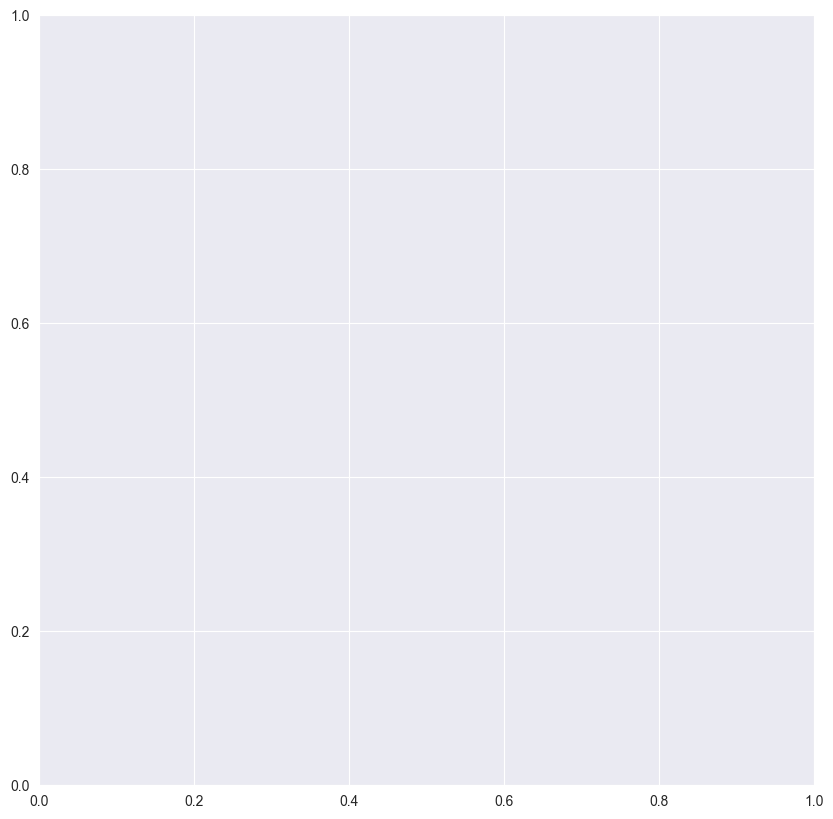

In [65]:
# World Cloud
tweet_All = " ".join(review for review in twitter["post"])

fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

In [ ]:
# World Cloud
tweet_All = " ".join(review for review in reddit_data["comment"])

fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

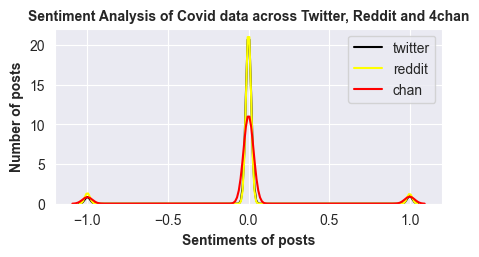

In [67]:
# Comparing sentiments of all posts or tweets received from three datasets
plt.subplot(2,1,1)
plt.rc('figure',figsize=(5,5))
plt.title('Sentiment Analysis of Covid data across Twitter, Reddit and 4chan',fontsize=10,fontweight='bold')
sns.kdeplot(twitter['AVG_Sentiment'], color = 'black')
sns.kdeplot(reddit['AVG_Sentiment'], color = 'yellow')
sns.kdeplot(chan['AVG_Sentiment'], color = 'red')
plt.xlabel('Sentiments of posts',fontsize=10,fontweight='bold')
plt.ylabel('Number of posts',fontsize=10,fontweight='bold')
plt.legend(['twitter','reddit','chan'], fontsize = 10)
plt.savefig("three.png")

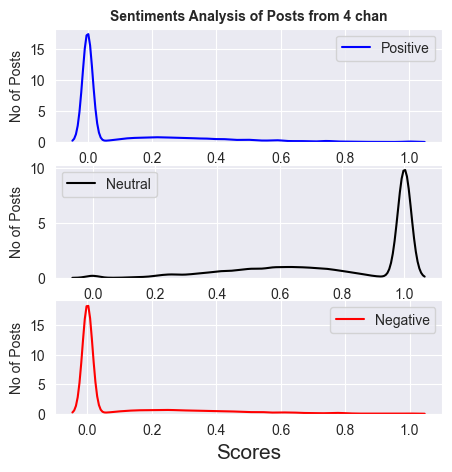

In [76]:
# Sentiment Distribution showing postive,negative and neutral linear subplots of 4chan data
plt.rc('figure',figsize=(5,5))
plt.subplot(3,1,1)
plt.title('Sentiments Analysis of Posts from 4 chan',fontsize=10,fontweight='bold')
sns.kdeplot(chan['Positive'], color = 'blue')
plt.xlabel('Scores',fontsize = 15)
plt.xticks(fontsize=10)
plt.ylabel('No of Posts',fontsize = 10)
plt.yticks(fontsize=10)
plt.legend(['Positive'], prop={'size': 10})

plt.subplot(3,1,2)
sns.kdeplot(chan['Neutral'], color = 'black')
plt.xlabel('Scores',fontsize = 15)
plt.xticks(fontsize=10)
plt.ylabel('No of Posts',fontsize = 10)
plt.yticks(fontsize=10)
plt.legend(['Neutral'], prop={'size': 10})

plt.subplot(3,1,3)
sns.kdeplot(chan['Negative'], color = 'red')
plt.xlabel('Scores',fontsize = 15)
plt.xticks(fontsize=10)
plt.ylabel('No of Posts',fontsize = 10)
plt.yticks(fontsize=10)
plt.legend(['Negative'],prop={'size': 10})
plt.savefig('four.png')


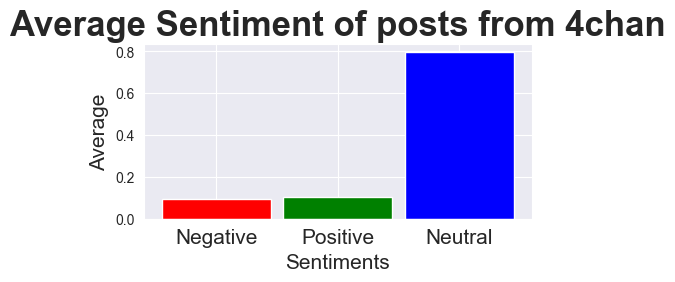

In [80]:
#Average Sentiment of the posts from 4chan
plt.subplot(2,1,2)
plt.title('Average Sentiment of posts from 4chan',fontsize=25,fontweight='bold')
neg_avg = (chan['Negative'].sum())/len(chan)
pos_avg = (chan['Positive'].sum())/len(chan)
neu_avg = (chan['Neutral'].sum())/len(chan)
bar_width = 0.9
sentiment = ['Negative','Positive','Neutral']
sentiment_avg = [neg_avg, pos_avg, neu_avg]
plt.bar(sentiment, sentiment_avg, bar_width, color = ['red', 'green', 'blue'])
plt.xticks(fontsize=15)
plt.ylabel('Average',fontsize=15)
plt.xlabel('Sentiments',fontsize=15)
plt.savefig('five.png')
plt.show()

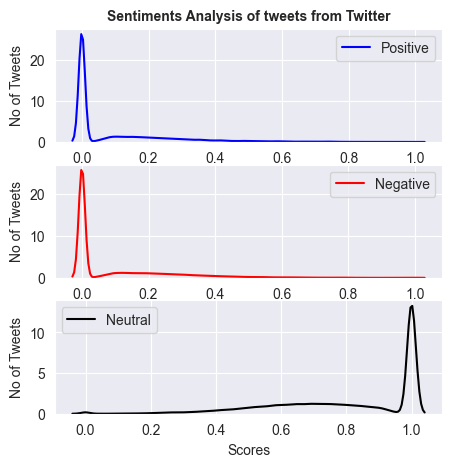

In [81]:
#Sentiment Distribution showing postive,negative and neutralscore linear subplots of twitter data
plt.subplot(3,1,1)
plt.title('Sentiments Analysis of tweets from Twitter',fontsize=10,fontweight='bold')
sns.kdeplot(twitter['Positive'], color = 'blue')
plt.xlabel('Scores',fontsize = 10)
plt.ylabel('No of Tweets',fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Positive'], prop={'size': 10})

plt.subplot(3,1,2)
sns.kdeplot(twitter['Negative'], color = 'red')
plt.xlabel('Scores',fontsize = 10)
plt.ylabel('No of Tweets',fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Negative'],prop={'size': 10})

plt.subplot(3,1,3)
sns.kdeplot(twitter['Neutral'], color = 'black')
plt.xlabel('Scores',fontsize = 10)
plt.ylabel('No of Tweets',fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Neutral'], prop={'size': 10})
plt.savefig('six.png')


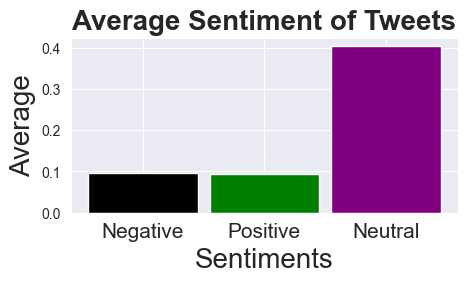

In [83]:
#Average Sentiment of the posts from twitter
plt.subplot(2,1,2)
plt.title('Average Sentiment of Tweets',fontsize=20,fontweight='bold')
neg_avg = (twitter['Negative'].sum())/(len(twitter))
pos_avg = (twitter['Positive'].sum())/(len(twitter))
neu_avg = (twitter['Neutral'].sum()/2)/(len(twitter))
bar_width = 0.9
sentiment = ['Negative','Positive','Neutral']
sentiment_avg = [neg_avg, pos_avg, neu_avg]
plt.bar(sentiment, sentiment_avg, bar_width, color = ['black', 'green', 'purple'])
plt.xticks(fontsize=15)
plt.ylabel('Average',fontsize=20)
plt.xlabel('Sentiments',fontsize=20)
plt.savefig('seven.png')
plt.show()

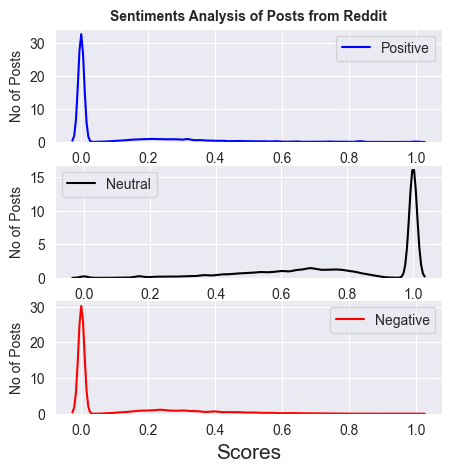

In [86]:
#Sentiment Distribution showing postive,negative and neutralscore linear subplots of reddit data
plt.rc('figure',figsize=(5,5))
plt.subplot(3,1,1)
plt.title('Sentiments Analysis of Posts from Reddit',fontsize=10,fontweight='bold')
sns.kdeplot(reddit['Positive'], color = 'blue')
plt.xlabel('Scores',fontsize = 15)
plt.xticks(fontsize=10)
plt.ylabel('No of Posts',fontsize = 10)
plt.yticks(fontsize=10)
plt.legend(['Positive'], prop={'size': 10})

plt.subplot(3,1,2)
sns.kdeplot(reddit['Neutral'], color = 'black')
plt.xlabel('Scores',fontsize = 15)
plt.xticks(fontsize=10)
plt.ylabel('No of Posts',fontsize = 10)
plt.yticks(fontsize=10)
plt.legend(['Neutral'], prop={'size': 10})

plt.subplot(3,1,3)
sns.kdeplot(reddit['Negative'], color = 'red')
plt.xlabel('Scores',fontsize = 15)
plt.xticks(fontsize=10)
plt.ylabel('No of Posts',fontsize = 10)
plt.yticks(fontsize=10)
plt.legend(['Negative'],prop={'size': 10})
plt.savefig('eight.png')


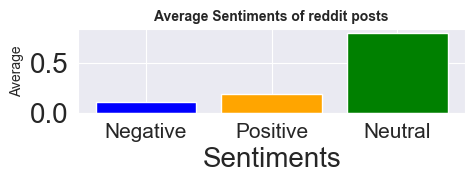

In [88]:
#Average Sentiment of the posts from reddit
plt.subplot(4,1,4)
plt.title('Average Sentiments of reddit posts',fontsize=10,fontweight='bold')
neg_avg = (reddit['Negative'].sum())/len(reddit.index)
pos_avg = (reddit['Positive'].sum())/(len(reddit.index)/2)
neu_avg = (reddit['Neutral'].sum())/len(reddit.index)
sentiment = ['Negative','Positive','Neutral']
sentiment_avg = [neg_avg, pos_avg, neu_avg]
plt.bar(sentiment, sentiment_avg, color = ['blue', 'orange', 'green'], width = 0.8)
plt.ylabel('Average',fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Sentiments',fontsize=20)
plt.savefig('nine.png')
plt.show()